In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


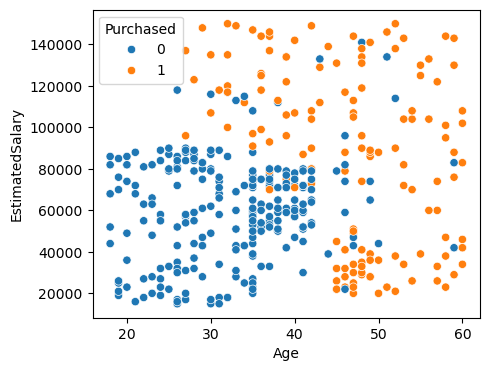

In [4]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="Age", y="EstimatedSalary",data=data, hue="Purchased")
plt.show()

In [5]:
x = data.iloc[:,:-1]
y = data["Purchased"]

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_tarin,y_train)
knn.score(x_test,y_test)*100 , knn.score(x_train,y_train)*100

(91.25, 92.5)

In [33]:
for i in range(1,20):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_tarin,y_train)
    print(i,knn1.score(x_test,y_test)*100 , knn1.score(x_train,y_train)*100)

1 85.0 99.6875
2 86.25 91.5625
3 91.25 92.5
4 92.5 91.875
5 92.5 90.9375
6 90.0 90.9375
7 93.75 91.875
8 92.5 90.625
9 93.75 91.25
10 92.5 90.625
11 92.5 90.9375
12 92.5 91.25
13 92.5 91.5625
14 92.5 90.625
15 92.5 90.625
16 92.5 90.0
17 92.5 90.625
18 92.5 90.0
19 92.5 90.9375


In [37]:
x,y

(          Age  EstimatedSalary
 0   -1.781797        -1.490046
 1   -0.253587        -1.460681
 2   -1.113206        -0.785290
 3   -1.017692        -0.374182
 4   -1.781797         0.183751
 ..        ...              ...
 395  0.797057        -0.844019
 396  1.274623        -1.372587
 397  1.179110        -1.460681
 398 -0.158074        -1.078938
 399  1.083596        -0.990844
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [39]:
knn.predict([[-1.781797,-1.490046],
            [-0.253587,-1.460681],
            [1.083596,-0.990844]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 1], dtype=int64)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


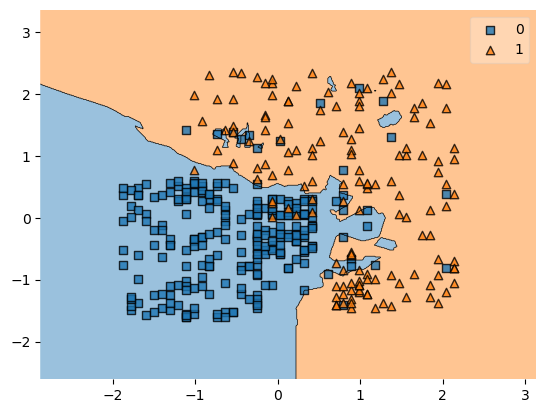

In [41]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(),y.to_numpy(), clf=knn)
plt.show()